In [287]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import networkx as nx
import ipywidgets as widgets

from IPython.display import display
from IPython.display import clear_output

In [288]:
class Spremnik:
    q = np.array([], dtype=int)
        
    def front(self):
        return self.q[0]
    
    def pop(self):
        val = self.q[0]
        self.q = np.delete(self.q, 0)
        return val
    
    def size(self):
        return self.q.size
    
    def empty(self):
        return self.q.size == 0
    
    def flip(self):
        self.q = np.flip(self.q)
        return self
    
    # vraca string, treba mi za print(class) poziv
    def __str__(self):
        return np.array2string(self.q, separator=', ')
    
class Queue(Spremnik):
    def push(self, val):
        self.q = np.insert(self.q, len(self.q), val)
        
class Stack(Spremnik):
    def push(self, val):
        self.q = np.insert(self.q, 0, val)

In [289]:
def dohvati_put(roditelj_cvora, pocetni_cvor, ciljni_cvor):
    q = Stack()
    trenutni_cvor = ciljni_cvor
    
    while trenutni_cvor != pocetni_cvor:
        q.push(trenutni_cvor)
        trenutni_cvor = roditelj_cvora[trenutni_cvor]
        
    q.push(trenutni_cvor)
    
    return q

In [290]:
def BFS(G, pocetni_cvor, ciljni_cvor):
    q = Queue()
    q.push(pocetni_cvor)
    
    posjeceni_cvorovi = np.zeros(len(G), dtype=int)
    posjeceni_cvorovi[pocetni_cvor] = True
    
    roditelj_cvora = np.zeros(len(G), dtype=int)
    roditelj_cvora[pocetni_cvor] = pocetni_cvor;

    put_obilaska_stabla = Stack()
    
    while q.size():
        trenutni_cvor = q.pop()
        
        put_obilaska_stabla.push(trenutni_cvor)

        if trenutni_cvor == ciljni_cvor:
            return { 'put' : dohvati_put(roditelj_cvora, pocetni_cvor, ciljni_cvor), 
                     'put_obilaska' : put_obilaska_stabla.flip()
                   }
        
        for susjedni_cvor in G[trenutni_cvor]:
            if posjeceni_cvorovi[susjedni_cvor] == False:
                posjeceni_cvorovi[susjedni_cvor] = True
                roditelj_cvora[susjedni_cvor] = trenutni_cvor
                q.push(susjedni_cvor)

In [291]:
def DFS(G, pocetni_cvor, ciljni_cvor):
    s = Stack()
    s.push(pocetni_cvor)
    
    posjeceni_cvorovi = np.zeros(len(G), dtype=int)
    posjeceni_cvorovi[pocetni_cvor] = True
    
    roditelj_cvora = np.zeros(len(G), dtype=int)
    roditelj_cvora[pocetni_cvor] = pocetni_cvor;
    
    put_obilaska_stabla = Stack()
    
    while s.empty() == False:
        trenutni_cvor = s.pop()
        
        put_obilaska_stabla.push(trenutni_cvor)
        
        if trenutni_cvor == ciljni_cvor:
            return { 'put' : dohvati_put(roditelj_cvora, pocetni_cvor, ciljni_cvor), 
                     'put_obilaska' : put_obilaska_stabla.flip()
                   }
        
        for susjedni_cvor in G[trenutni_cvor]:
            if posjeceni_cvorovi[susjedni_cvor] == False:
                posjeceni_cvorovi[susjedni_cvor] = True
                roditelj_cvora[susjedni_cvor] = trenutni_cvor
                s.push(susjedni_cvor)

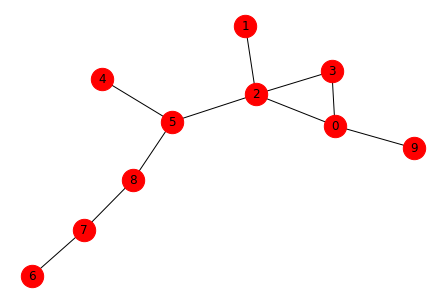

In [292]:
# s ovim generiram random povezan graf
G = nx.generators.random_graphs.connected_watts_strogatz_graph(10, 3, 0.5, 10000)

nx.draw_kamada_kawai(G, node_size=500, with_labels=True, node_color='red')

In [293]:
def ispisi_output():
    for index, ime_algoritma in enumerate(imena_algoritama):
        node_colors[ime_algoritma] = [node_colors_map[ime_algoritma][node] for node in G.nodes()]
        plt.subplot(1, len(imena_algoritama), index + 1)
        nx.draw_kamada_kawai(G, node_size=300, with_labels=True, node_color=node_colors[ime_algoritma])
    
    clear_output(wait=True)
    
    display(HBox, output)

def promjeni_boju_cvora(put_1, put_2, colors_map, boja):
    if put_1.empty() == False:
            put_2.push(put_1.pop())
            colors_map[put_2.front()] = boja;
    
def slijedeci_clicked(b):
    for ime_algoritma in imena_algoritama:
        promjeni_boju_cvora(put[ime_algoritma], prijedeni_put[ime_algoritma], 
                            node_colors_map[ime_algoritma], 'yellow'
                            )

    ispisi_output()
        
def prethodni_clicked(b):
    for ime_algoritma in imena_algoritama:
        promjeni_boju_cvora(prijedeni_put[ime_algoritma], put[ime_algoritma],
                            node_colors_map[ime_algoritma], 'red'
                            )
        
    ispisi_output()

Output()

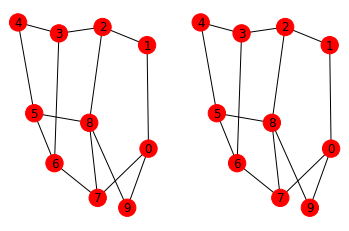

In [397]:
# definiramo gumbe
slijedeci = widgets.Button(description=">")
prethodni = widgets.Button(description="<")
output = widgets.Output()
HBox = widgets.HBox([prethodni, slijedeci])

slijedeci.on_click(slijedeci_clicked)
prethodni.on_click(prethodni_clicked)

G = nx.generators.random_graphs.newman_watts_strogatz_graph(10, 2, 0.35, np.random.randint(1000))

pocetni_cvor = 1
ciljni_cvor = 7

# za dodat novi algoritam samo dodati ime i u varijablu put dodati pripadnu funkciju
imena_algoritama = ['BFS', 'DFS']
vrsta = 'put_obilaska'

prijedeni_put = { ime_algoritma : Stack() for ime_algoritma in imena_algoritama }
put = { 'BFS' : BFS(G, pocetni_cvor, ciljni_cvor)[vrsta], 
        'DFS' : DFS(G, pocetni_cvor, ciljni_cvor)[vrsta]
      }

# dictionary s bojama za svaki nod
node_colors_map = { ime_algoritma : { i : 'red' for i in range(len(G)) } for ime_algoritma in imena_algoritama }

# niz odgovarajucih boja
node_colors = { ime_algoritma : [node_colors_map[ime_algoritma][node] for node in G.nodes()] 
               for ime_algoritma in imena_algoritama 
              }

ispisi_output()